In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Mass and spring system:<br>
$\ddot{x} = -\omega^{2} x$

Or, as two ODEs, the system is:<br>
$\dot{x_{1}} = x_{2}$<br>
$\dot{x_{2}} = -\omega^{2} x_{1}$

In [2]:
# RHS of mass and spring ODE.
def MassSpringRHS(t, x, params):
    omega = params
    x1, x2 = x
    f1 = x2
    f2 = -(omega**2) * x1
    return (np.array([f1, f2]))

In [3]:
def SolveRK4(dt, tn, xn, params, RHS):
    #here, xn is a vector.
    #RHS is the ODE RHS func, and tn, xn, params are inputs to this func.
    
    k1 = dt * RHS(tn, xn, params)
    k2 = dt * RHS(tn + 0.5*dt, xn + 0.5*k1, params)
    k3 = dt * RHS(tn + 0.5*dt, xn + 0.5*k2, params)
    k4 = dt * RHS(tn + dt, xn + k3, params)
    
    dx = (1.0/6) * (k1 + 2*k2 + 2*k3 + k4)
    return (dx)

In [4]:
# Time:
t_start = 0
t_stop = 10**2
dt = 1e-2

t_List = np.arange(t_start, t_stop, dt)

N_t = len(t_List)
print(N_t)

10000


In [5]:
N = 2 #number of ODEs in the system.

In [6]:
# IC:
x0 = np.array([1., 0.])

In [7]:
# Parameters:
params = 1.0

In [8]:
%%time
x1_List = []
x2_List = []

x = x0.copy()
for t in t_List:
    x1_List.append(x[0])
    x2_List.append(x[1])
    dx = SolveRK4(dt, t, x, params, MassSpringRHS)
    x = x + dx

CPU times: user 264 ms, sys: 5.05 ms, total: 269 ms
Wall time: 283 ms


In [9]:
%%time
# solving ODEs using scipy ODE solver:
sol = odeint(MassSpringRHS, x0, t_List, args=(params,), tfirst=True)

CPU times: user 6.44 ms, sys: 754 µs, total: 7.2 ms
Wall time: 6.7 ms


In [10]:
# True solution:
TrueAns = np.cos(t_List)

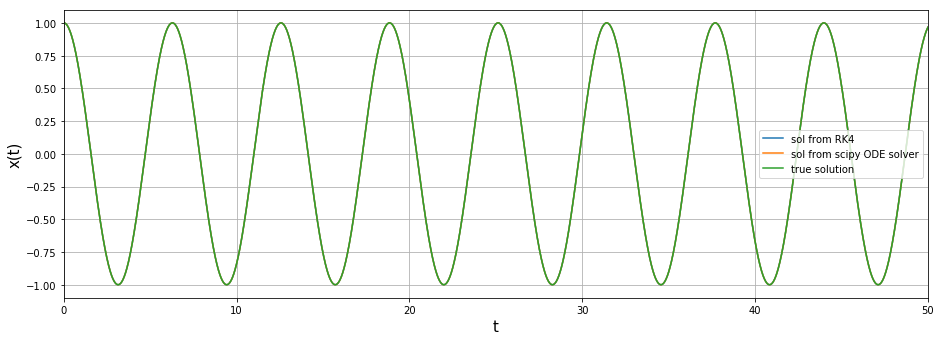

In [11]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])

ax.plot(t_List, x1_List, "-", label="sol from RK4")
ax.plot(t_List, sol[:,0], "-", label="sol from scipy ODE solver")
ax.plot(t_List, TrueAns, "-", label="true solution")

ax.set_xlim([0, 50])
ax.set_xlabel("t", fontsize=15)
ax.set_ylabel("x(t)", fontsize=15)

ax.grid(True)
ax.legend()
plt.show()

In [12]:
rk4_err = np.abs(x1_List - TrueAns)
odeint_err = np.abs(sol[:,0] - TrueAns)

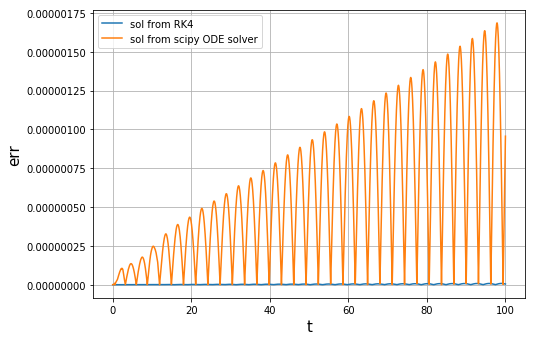

In [13]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(t_List, rk4_err, "-", label="sol from RK4")
ax.plot(t_List, odeint_err, "-", label="sol from scipy ODE solver")


ax.set_xlabel("t", fontsize=15)
ax.set_ylabel("err", fontsize=15)

# ax.set_ylim([-1e-5, 1e-5])

ax.grid(True)
ax.legend()
plt.show()

In [14]:
print("Approx order of error using my RK4 solver: {:.2f}".format(np.log10(max(rk4_err))))
print("Approx order of error using scipy's odeint solver: {:.2f}".format(np.log10(max(odeint_err))))

Approx order of error using my RK4 solver: -8.08
Approx order of error using scipy's odeint solver: -5.77
